In [1]:
from IPython.display import display, HTML, Javascript

def f():
    return HTML("""
    <style>
        @font-face {
            /* تعریف نام فونت */
            font-family: 'BZar';
            /* اکسپلورر 9 به بعد */
            src: url('font/BZar.eot');
            /* بررسی نصب بودن فونت در سیستم کاربر */
            src: local('bZar'),
                 /* برای برخی از مرورگرها مانند سافاری */
                 local('b Zar'),
                 /* هک برای اکسپلورر 8 و ماقبل */
                 url('font/BZar.eot?#iefix') format('embedded-opentype'),
                 /* فرمت مناسب مرورگرهای خیلی جدید */
                 url('font/BZar.woff2') format('woff2'),
                 /* فرمت مناسب مرورگرهای تقریبا جدید */
                 url('fonts/BZar.woff') format('woff'),
                 /* تمام مرورگرها به جزء اکسپلورر */
                 url('font/BZar.ttf') format('truetype'),
                 /* نسخه های قدیمی سیستم عامل iOS */
                 url('fonts/BZar.svg#BZar') format('svg');
            font-style: normal;
            font-weight: normal;
            font-display: swap;
        }
    
    
        .reveal .slides {
            direction: rtl;
            text-align: right;
        }
        
        div {
            direction: ltr;
            text-align: left;
        }
        
        p > img {
          display: block;
          margin-left: auto;
          margin-right: auto;
          max-width:75%; 
          height:auto;
        }
        
        div.text_cell_render.rendered_html > *, li > p, .rendered_html p, #quarto-document-content > *
        {
            direction: rtl;
            text-align: right;
            font-family: BZar, Tahoma, Geneva, sans-serif;
            font-size: x-large;
            line-height: 26pt;
        }
        
        .jp-CodeMirrorEditor .jp-Editor .jp-InputArea-editor {
            direction: rtl !important;
        }
        
        .CodeMirror-lines .output_subarea .output_text .output_stream .output_stdout{
            direction: ltr !important;
        }
    </style>
    """)

f()

In [2]:
from IPython.display import display, HTML, Javascript

def g():
    return HTML("""
    <link rel="stylesheet" href="css/jquery.jqZoom.css" />
    <script src="js/jquery-1.12.4.min.js"></script>
    <script src="js/jquery.zoom.min.js"></script>
    <script>
        $(document).ready(function(){
            $("img").children().off();
            $('img')
            .wrap('<span style="display:inline-block"></span>')
            .css('display', 'block')
            .parent()
            .zoom({ on:'grab', duration: 150, magnify: 1 });
        });
    </script>
    """)

g()

به نام خدا

# فصل دوم

## آشنایی با تنسور و برخی مفاهیم پایه

اهم مطالب این فصل در مورد آشنایی با تنسور و عملیات روی آن یعنی مشتق گیری و گرادیان نزولی است.

در این فصل یک مثال اولیه در مورد دسته بندی ارقام دستنویس روی مجموعه داده‌ی MNIST   ارائه می‌کنیم، گرچه درک جزئیات این مساله اولیه الزامی نیست.

مجموعه داده MNIST قدمتی برابر با خود یادگیری ماشین دارد در این مجموعه داده ۶۰۰۰۰ عکس رقم با ابعاد ۲۸ در ۲۸  به عنوان مجموعه آموزشی و ۱۰۰۰۰ عکس برای تست با همین ابعاد موجود است 

این اطلاعات را در ۱۹۸۰ توسط NIST جمع‌آوری شده است. 

در واقع این مجموعه داده به عنوان Hello World  در دنیای یادگیری ماشین استفاده می شود.




In [20]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
test_images.shape

(10000, 28, 28)

In [23]:
test_labels[0]

7

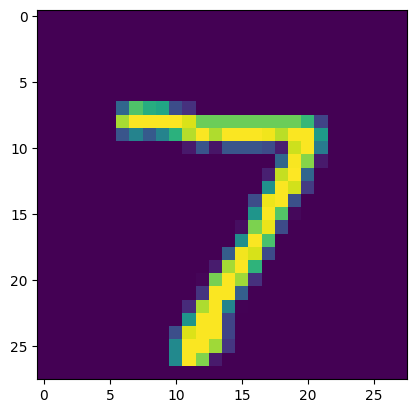

In [24]:
from matplotlib import pyplot as plt
plt.imshow(test_images[0])
plt.show()

In [31]:
print(train_images[0][:][:])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

8


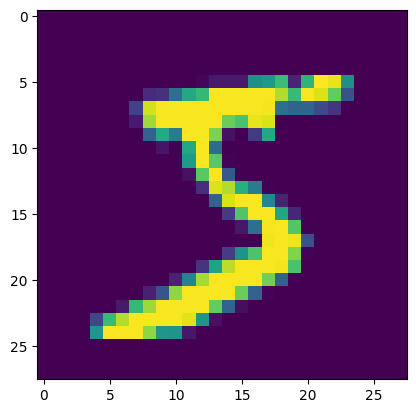

In [32]:
import random
idx = random.randrange(train_images.shape[0])
print(train_labels[idx])
plt.imshow(train_images[idx])
plt.show()


در این کد ابتدا داده‌ها بارگذاری می شوند روند کلی اجرا به این صورت است که از روی داده های آموزشی یادگیری انجام می شود و از روی داده های تست فرآیند ارزیابی انجام می شود.



بر اساس شبکه عصبی بر روی آموزش لایه های متوالی  استوار است هر کدام از این لایه‌ها مانند فیلتر هایی ورودی را به نمایش مناسبتری که به خروجی مطلوب نزدیک تر هستند ، تبدیل می کنند معمولاً لایه‌ها به صورت زنجیره‌ای به هم وصل شدند و خروجی یک لایه به عنوان ورودی لایه بعدی استفاده می شود.

![neurons](img/02-layers.png)


## مفاهیم  fully connected (Dense)  و Softmax

![fully](img/02-fully.png)

![softmax](img/02-softmax.jpeg)


- بعد از طراحی شبکه و آماده سازی داده‌ها سه چیز دیگر مورد نیاز است 
  1. الگوریتم بهینه سازی  
  2. تعریف تابع هدف (یا loss function)   
  3. معیار ارزیابی


In [34]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [39]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [36]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [49]:
test_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [50]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0284 - accuracy: 0.9917
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0219 - accuracy: 0.9935
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0174 - accuracy: 0.9947
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0127 - accuracy: 0.9966
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0098 - accuracy: 0.9974


In [51]:
test_digits = test_images[0:1]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 46ms/step


array([1.5277316e-11, 3.6767464e-15, 1.2131254e-09, 3.5122707e-07,
       3.6617817e-16, 8.0030730e-12, 6.7576481e-22, 9.9999964e-01,
       2.3668661e-10, 5.7169650e-08], dtype=float32)

    array([8.3811331e-09, 6.1948477e-09, 8.2861570e-06, 4.8988115e-04,
           4.6097921e-11, 1.8410864e-06, 5.3281235e-13, 9.9949050e-01,
           3.1962665e-07, 9.0377707e-06], dtype=float32)


In [45]:
predictions[0].argmax()

7

In [46]:
predictions[0][7]

0.99953926

    0.9994905


In [52]:
test_labels[0]

7

**ارزیابی مدل بر روی داده‌های جدید**


In [48]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0658 - accuracy: 0.9793
test_acc: 0.9793000221252441


نکته:  قبل از ورود داده‌ها به شبکه آنها را بین صفر تا یک نرمال سازی می کنیم

در این مثال از معیار دقت Accuracy  به عنوان معیار ارزیابی استفاده شده است


برای به دست آوردن نتیجه از تابع argmax  استفاده می شود


نکته:  معمولاً دقت تست کمی از آموزش کمتر است ولی اگر دقت  آموزش بالا باشد ولی دقت تست خیلی کم باشد احتمالاً در شبکه  overfitting صورت گرفته است.

## تنسور چیست؟
آنقدر تنسور مهم است که کل بسته پایه را به عنوان TensorFlow  نامیدند

تنسور مانند یک ظرف مانند ماتریس است  که برای حمل داده‌ها با ابعاد بالا استفاده می شود.

گاهی اوقات از عبارت dim    به جای  rank یا axis  برای اشاره به ابعاد تنسور استفاده می شود. بهتر هست به جای سه‌بعدی بگوییم با رنک سه. 

## انواع تنسور
1. اسکالر (تنسور با بعد ۰)
2. بردار (تنسور با بعد ۱)
3. ماتریس (تنسور با بعد ۲)
4. تنسور عمومی:  با بعد ۳ و بالاتر که معمولاً در مورد  ویدئو استفاده می شود.



## هر تنسور ویژگی‌های به صورت زیر دارد: 

1. rank  که با تابع ndim به دست می‌آید.
2. shape که به صورت تاپل هست و تعداد ابعاد را در راستای هر محور اعلام می‌کند.
3. dtype نوع داده



## تعدادی مثال


### Scalars (rank-0 tensors)


In [3]:
import numpy as np
x = np.array(12)
x

array(12)

In [4]:
x.ndim

0

### Vectors (rank-1 tensors)

In [5]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [7]:
x.ndim

1

### Matrices (rank-2 tensors)


In [8]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors


In [9]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [12]:
x[1,0,0::2]

array([5, 2, 0])

### یادآوری  مثال MNIST  ویژگیهای تنسور

In [14]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [15]:
train_images.ndim

3

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
train_images.dtype

dtype('uint8')

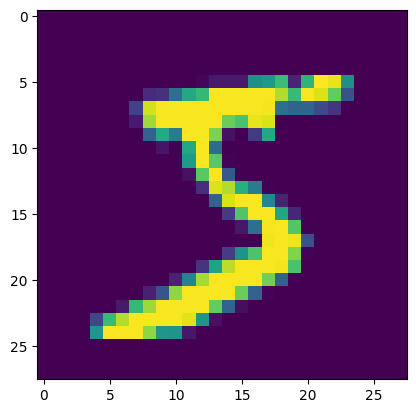

In [19]:
import matplotlib.pyplot as plt
idx = 0
img = train_images[0]
plt.imshow(img)
plt.show()

## نمایش چهارمین رقم


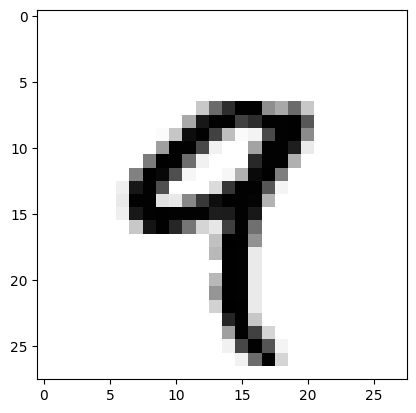

In [20]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [21]:
train_labels[4]

9

### مفهوم slice

In [22]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [23]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [24]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [25]:
my_slice = train_images[:, 14:, 14:]

In [26]:
my_slice = train_images[:, 7:-7, 7:-7]

In [27]:
my_slice.shape

(60000, 14, 14)

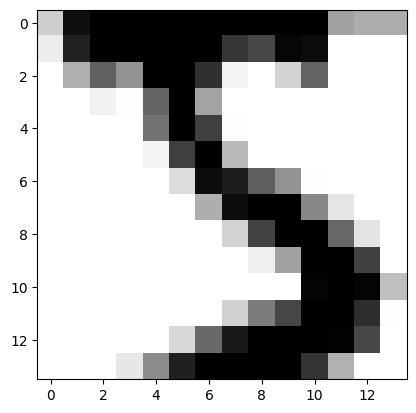

In [29]:
img = my_slice[0]
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

### مفهوم batch

In [30]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

- نکته:  معمولاً به بعد اول (اندیس صفر)  محور  دسته  batch axis خوانده می‌شود. 

- مثال هایی از تنسور برای داده های واقعی
  
  1. بردار دو بعدی: اطلاعات جمعیت، شمارش تعداد کلمات در اسناد
     
  2. بردار سه‌بعدی: اطلاعات سری زمانی (sample, timestep, feature) - داده‌های بورس یا tweets
     
  3. بردار چهاربعدی: تصاویر (sample, height, width, channel) - مفهوم channel_first و channel_last - البته مدل channel_last روزبه‌روز محبوب‌تر می‌شود.
     
  4. بردار پنج‌بعدی: ویدئو (sample, frame, height, width, channels) - مثلا ۶۰ ثانیه از یک ویدئوی 144x256 با 4=fps و batch_size=4 با فرض ذخیره کردن اعداد رنگ‌ها به صورت float32 حجمی برابر با ۱۰۶ میلیون تنسور یعنی ۴۰۵ مگابایت خواهد داشت! 


- نکته:  عملگر های روی عناصر تنسور  به صورت مستقل و روی عناصر (element-wise)  خیلی سریع اجرا می شود چون قابلیت توازی بالا وجود دارد (vectorize)

- این عملیات جبر خطی پایه توسط BLAS (Basic Linear Algebra Subsystem)  اجرا می شود که معمولاً در زبانهای C و Fortran پیاده‌سازی شده است.

- نکته:  عملیات روی تنسورها  روی هسته های کارت گرافیکی با کمک CUDA  می توانند اجرا شوند که خیلی سریع تر هست.

- مفهوم broadcast:  ماتریس یا تنسور کوچکتر از لحاظ محورها به اندازه کافی تکرار میشود (expand_dim)  تا با تنسور بزرگتر هم اندازه شود و قابلیت محاسبه داشته باشد

    - مثال صفحه ۴۰ یا مثال از سایت Numpy تابع maximum

In [31]:
import numpy as np
print(np.maximum([2, 3, 4], [1, 5, 2]))
print(np.eye(2))
print(np.maximum(np.eye(2), [0.5, 2])) # broadcasting


[2 5 4]
[[1. 0.]
 [0. 1.]]
[[1.  2. ]
 [0.5 2. ]]


- عملگر *  به صورت مبتنی بر عنصر (element_wise)  هست ولی عملگر dot  به صورت ضرب ماتریس ای (برای بردارهای دوبعدی) انجام میشود. همچنین عملگر @ را برای ضرب ماتریسی داریم.

In [32]:
a = np.array([1,2,3])
b = np.array([4,5,0])
print(a*b)
print(a@b)

[ 4 10  0]
14


In [38]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))
print((X*y).shape)  # broadcast
print((X@y).shape)
print(y.ndim)

(32, 10)
(32,)
1


In [39]:
y.shape

(10,)

In [40]:

y = np.expand_dims(y, axis=0)
print(y.shape)
print(y.ndim)

(1, 10)
2


In [42]:
print([1,2]*32)

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]


In [48]:
Y_tmp = np.array([y]*32)
print(Y_tmp.shape)
Y = np.concatenate([y] * 32, axis=0)
print(Y.shape)

(32, 1, 10)
(32, 10)


In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [49]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

## تفسیر هندسی عملیات روی تنسورها

- هر تنسور دوبعدی به صورت یک بردار قابل تصور هست:

![تنسور دو بعدی](img/02-07.png)

- جمع دو تنسور هم به صورت جمع دو بردارد قابل تفسیر هست
![جمع دو تنسور](img/02-08.png)


- جمع به معنی جابجایی بدون تغییر شکل است 


![جمع](img/02-09.png)


- ضرب ماتریسی به صورت یک تبدیل خطی است که می‌تواند به صورت دوران یا مقیاس‌بندی نمایش داده شود


![دوران](img/02-10.png)

![مقیاس‌گذاری](img/02-11.png)

- تبدیل افین  به صورت y=W.x+b  نشان داده می شود که در واقع توسط یک لایه Dense  بدون تابع فعال‌ساز قابل پیاده سازی است شکل مربوطه را ببینید

![تبدیل افین](img/02-12.png)

- نکته: چند تبدیل افین متوالی در واقع یک تبدیل افین هست. بنابراین نقش توابع فعال ساز هست که تکرار این لایه‌ها را غنی و سودمند می‌کند.

$${affine2}({affine1}(x)) = W_2 • (W_1 • x + b_1) + b_2 = (W_2 • W_1) • x + (W_2 • b_1 + b_2)$$

- تفسیر هندسی عملکرد شبکه عصبی مانند باز کردن دو کاغذ رنگی مچاله شده در یکدیگر است

![مچاله](img/02-14.png)

## روش   گرادیان نزولی
- تاثیر هر پارامتر اگر بخواهد به صورت جداگانه  بررسی شود با فرض ثابت بودن سایر پارامتر را باید دوباره عملیات  محاسبات پیشرو forward pass  حساب شود که این کار هزینه بر است بنابراین از روش گرادیان نزولی استفاده می شود

- در واقع توسعه مفهوم مشتق برای توابع چند متغیر است که مقدار انحنا را در نقطه خاص نشان می دهد.

![](img/02-15.png)
![](img/02-16.png)
![](img/02-17.png)

## نحوه به روز رسانی وزن‌ها در روش گرادیان نزولی

![SGD down a 1D loss curve (one learnable parameter)](img/02-18.png)

![Gradient descent down a 2D loss surface (two learnable parameters)](img/02-19.png)

## اهمیت مقدار مناسب نرخ یادگیری learning_rate

![A local minimum and a global minimum](img/02-20.png)


- نوع خاصی از روش گرادیان نزولی  به صورت استوکاستیک است که برای هر دسته داده‌ها به صورت تصادفی برای فرآیند آموزش انتخاب می‌شوند.

[https://www.analyticsvidhya.com/blog/2021/03/variants-of-gradient-descent-algorithm/](https://www.analyticsvidhya.com/blog/2021/03/variants-of-gradient-descent-algorithm/)

- همچنین داده‌ها به صورت mini-batch تحویل می‌شوند یعنی تعدادی داده‌ها در چندین مرحله تحویل می‌شوند و میانگین خطا محاسبه می‌شود. این کار همگرایی بهتری نسبت به true SGD هست و از batch SGD کم هزینه‌تر هست.
  
- گاهی در SGD از سرعت در حرکت قبلی هم استفاده می‌شود. momentum  

In [ ]:
past_velocity = 0.
momentum = 0.1   # Constant momentum factor
while loss > 0.01: # Optimization loop
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum - learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)

# مطالب پیشرفته

- برای کسب اطلاعات بیشتر در مورد توابع اتلاف در Keras   می‌توانید 
[اینجا](https://neptune.ai/blog/keras-loss-functions)  را ببینید.

## مفهوم گراف محاسباتی (computation graph)

- گرافی برای نمایش دنباله محاسبات است که در محاسبه‌ی الگوریتم پس‌انتشار می‌توانید مفید باشد
- مزیت مهم آن این است که عملیات محاسباتی را به صورت یک داده در می‌آورد که می‌تواند به عنوان ورودی به تابع داده شود. 
- در BP از انتها حرکت می‌کنیم (loss) و به سمت لایه‌های قبلی می‌آییم.

![The computation graph representation of our two-layer model](img/02-21.png) 
![A basic example of a computation graph](img/02-22.png) 
![Running a forward pass](img/02-23.png) 
![Running a backward pass](img/02-24.png)
![Path from loss_val to w in the backward graph](img/02-25.png)




## درک کریستالی از پشت صحنه 


In [ ]:
import tensorflow as tf

x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = tf.math.exp(x) + 3
grad_of_y_wrt_x = tape.gradient(y, x)
print(grad_of_y_wrt_x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
print(grad_of_y_wrt_x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
print(W)
print(b)
print(x)
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
print(grad_of_y_wrt_W_and_b)

## یک مثال پیشرفته

## نگاهی دوباره به اولین مثال


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

## پیاده‌سازی مثال اول از پایه

### کلاس Dense ساده


In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property

    def weights(self):
        return [self.W, self.b]

### یک کلاس Sequential ساده


In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

### تولید دسته


In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

## یک گام اجرای مرحله یادگیری


In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

## حلقه کامل یادگیری


In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

## ارزیابی مدل


In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## خلاصه


- تنسورها پایه و اساس سیستم‌های یادگیری ماشین مدرن هستند. 
- آنها در انواع مختلف از dtype، rank و shape در دسترس هستند.
- یادگیری یک مدل یادگیری عمیق شامل یافتن مجموعه‌ای از وزن‌ها برای مدل است که تابع خطا (loss function) را به حداقل می‌رساند.
- یادگیری با رسم دسته های تصادفی از نمونه های داده و جابجایی پارامترهای مدل با توجه به گرادیان نرخ یادگیری اتفاق می افتد.
- کل فرآیند یادگیری با این واقعیت امکان پذیر می شود که همه عملیات روی تنسور‌ها در شبکه های عصبی قابل مشتق‌گیری هستند.
- دو مفهوم کلیدی که اغلب در فصل های آینده خواهید دید، خطا loss و بهینه‌سازی optimization هستند. 
- خطا مقداری است که در طول آموزش سعی می کنید آن را به حداقل برسانید و بهینه ساز روشی است که برای به روز رسانی پارامترها استفاده می کنید.